### Plotting Histograms of number of comments per user

In [78]:
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
import time
import datetime

In [79]:
# download dat from google drive: wikipdia data/v2
blocked_df = pd.read_csv('../data/all_no_admin_blocked_user_long_sample.tsv', sep = '\t')
random_df = pd.read_csv('../data/all_no_admin_post_sample.tsv', sep = '\t')

In [80]:
print blocked_df.shape
print random_df.shape

(82573, 14)
(38849, 11)


In [81]:
blocked_df.columns

Index([u'rev_comment', u'diff', u'insert_only', u'rev_id', u'page_id',
       u'page_title', u'rev_timestamp', u'user_id', u'user_text',
       u'block_reasons', u'block_timestamps', u'block_actions',
       u'block_params', u'clean_diff'],
      dtype='object')

In [82]:
grouped_blocked = blocked_df.groupby('user_id', as_index=False).agg({'rev_id': 'count'})
grouped_random = random_df.groupby('user_id', as_index=False).agg({'rev_id': 'count'})

In [83]:
grouped_random.sort_values(by = 'rev_id', ascending = False)[0:5]

,user_id,rev_id
2624,5253460,270
1593,1616157,187
3679,10239913,187
2606,5183450,167
794,409043,137


In [84]:
grouped_blocked.sort_values(by = 'rev_id', ascending = False)[0:5]

,user_id,rev_id
909,5743316,910
903,5171797,823
2,21625,788
512,1249644,784
23,86685,763


In [85]:
def histogram_num_posts_per_user(df, bins, title):
    plt.figure()
    #weights = np.ones_like(df)/len(df)
    #df.plot.hist(bins = bins, legend = False, title = title, weights=weights)
    df.plot.hist(bins = bins, legend = False, title = title)
    #df.plot.hist(legend = False, weights=weights)
    #df.plot.hist()
    plt.ylabel('Quantity of users')
    plt.xlabel('Number of Posts')

In [86]:
bins = np.linspace(0,1000,11)

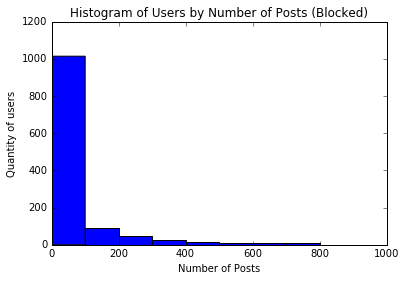

In [87]:
histogram_num_posts_per_user(grouped_blocked['rev_id'], bins = bins, title = "Histogram of Users by Number of Posts (Blocked)")

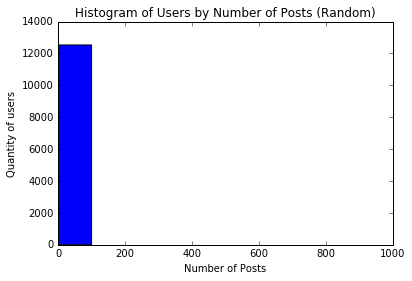

In [88]:
histogram_num_posts_per_user(grouped_random['rev_id'], bins = bins, title = "Histogram of Users by Number of Posts (Random)")

In [89]:
# Fraction of comments that come from top -> bottom contributors
# Expect the fast growth curve
# Sort data and plot cumulative distribution

In [90]:
def cum_histogram_num_posts_per_user(df, bins, title):
    plt.figure()
    weights = df
    df.plot.hist(bins = bins, legend = False, title = title, cumulative = True, normed = True, weights = weights)
    plt.ylabel('Percentage of total posts')
    plt.xlabel('Users who post at most x posts')

In [91]:
bins = np.linspace(0,1000,101)

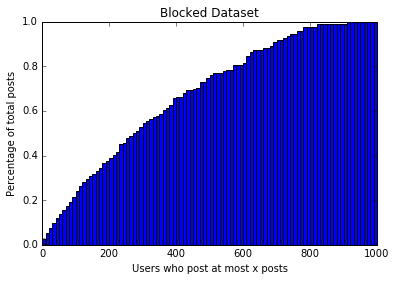

In [92]:
cum_histogram_num_posts_per_user(grouped_blocked['rev_id'], bins = bins, title = "Blocked Dataset")

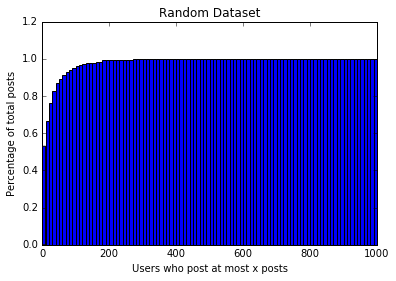

In [93]:
cum_histogram_num_posts_per_user(grouped_random['rev_id'], bins = bins, title = "Random Dataset")

### Looking at number of comments / year

In [95]:
blocked_df['rev_timestamp'][0:5]

0    2015-03-21T14:14:22Z
1    2008-05-01T20:26:59Z
2    2008-09-27T21:56:19Z
3    2008-03-29T23:08:03Z
4    2010-09-11T13:28:59Z
Name: rev_timestamp, dtype: object

In [105]:
blocked_df['rev_years'] = [datetime.datetime.strptime(t, "%Y-%m-%dT%H:%M:%SZ").year for t in blocked_df['rev_timestamp']]
random_df['rev_years'] = [datetime.datetime.strptime(t, "%Y-%m-%dT%H:%M:%SZ").year for t in random_df['rev_timestamp']]

In [106]:
grouped_blocked = blocked_df.groupby('rev_years', as_index=False).agg({'rev_id': 'count'})
grouped_random = random_df.groupby('rev_years', as_index=False).agg({'rev_id': 'count'})

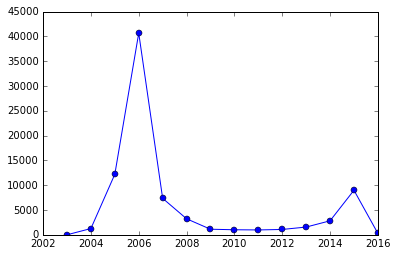

In [107]:
plt.plot(grouped_blocked['rev_years'], grouped_blocked['rev_id'], 'bo-')

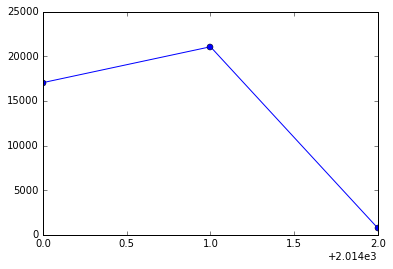

In [108]:
plt.plot(grouped_random['rev_years'], grouped_random['rev_id'], 'bo-')